In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'brainmentors'
os.environ['KAGGLE_KEY'] = "a75f144c32fe0f8299d6327932e64162"

!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 601M/612M [00:22<00:00, 28.9MB/s]
100% 612M/612M [00:22<00:00, 28.8MB/s]


In [ ]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Train.csv')

In [ ]:
df.shape

(39209, 8)

In [ ]:
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
img = Image.open(df['Path'][1000])
img = np.array(img)

In [ ]:
# img

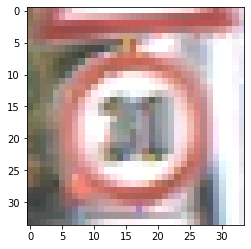

In [ ]:
plt.imshow(img)

In [ ]:
def load_data(df):
  images = []
  labels = []
  for i in range(len(df)):
    img = Image.open(df['Path'].iloc[i])
    img = img.resize((28,28))
    img = np.array(img)
    images.append(img)
    labels.append(df['ClassId'].iloc[i])

  return images, labels

In [ ]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [ ]:
train_images, train_labels = load_data(train_df)

In [ ]:
len(train_images)

39209

In [ ]:
test_images, test_labels = load_data(test_df)

In [ ]:
len(test_images)

12630

In [ ]:
type(train_images)

list

In [ ]:
x_train = np.asarray(train_images)
x_test = np.asarray(test_images)

In [ ]:
x_train.shape

(39209, 28, 28, 3)

In [ ]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#   plt.subplot(5,5,i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.imshow(x_train[i])
# plt.show()

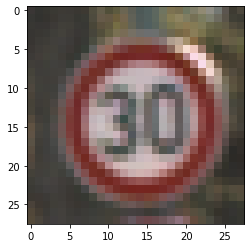

In [ ]:
plt.imshow(x_train[1220])

In [ ]:
# train_labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder()
train_labels = np.reshape(train_labels, (-1,1))
test_labels = np.reshape(train_labels, (-1,1))

train_labels = enc.fit_transform(train_labels).toarray()
test_labels = enc.fit_transform(test_labels).toarray()

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras import Model

In [ ]:
BUFFER_SIZE = 10000
train_df = tf.data.Dataset.from_tensor_slices((x_train, train_labels)).shuffle(BUFFER_SIZE).batch(32)

In [ ]:
train_df

<BatchDataset shapes: ((None, 28, 28, 3), (None, 43)), types: (tf.float64, tf.float64)>

In [ ]:
class MyModel(Model):
  def __init__(self): # Constructor
    super().__init__()  #Calling Parent Class Constructor
    self.conv1 = Conv2D(32, 3, padding='same', activation='relu')
    self.pool1 = MaxPool2D((2,2))
    self.conv2 = Conv2D(64, 3, padding='same', activation='relu')
    self.pool2 = MaxPool2D((2,2))
    self.flatten = Flatten()
    self.dense1 = Dense(256, activation='relu')
    self.dense2 = Dense(256, activation='relu')
    self.dense3 = Dense(43, activation='softmax')

  def call(self, data):
    x = self.conv1(data)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [ ]:
model = MyModel()

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
train_loss = tf.keras.metrics.Mean(name="training_loss")
train_acc = tf.keras.metrics.CategoricalAccuracy(name="training_acc")

In [ ]:
# decorator
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients((zip(gradients, model.trainable_variables)))

  train_loss(loss)
  train_acc(labels, predictions)

In [ ]:
epochs = 5
for epoch in range(epochs):
  for images, labels in train_df:
    train_step(images, labels)

  print(f"Epoch : {epoch}, Loss : {train_loss.result()}, Accuracy : {train_acc.result()}")
  train_loss.reset_states()
  train_acc.reset_states()

Epoch : 0, Loss : 0.9165573716163635, Accuracy : 0.725777268409729
Epoch : 1, Loss : 0.10647493600845337, Accuracy : 0.9681960940361023
Epoch : 2, Loss : 0.0472104549407959, Accuracy : 0.9869417548179626
Epoch : 3, Loss : 0.03936721384525299, Accuracy : 0.9885995388031006
Epoch : 4, Loss : 0.021452954038977623, Accuracy : 0.9936239123344421
